In [1]:
import random
import numpy as np
from scipy.spatial import distance
import pandas as pd


def give_me_vector(dim):
    return np.random.randint(100, size=dim)/100

def give_me_10points(dim):
    dataset = []
    for i in range(10):
        dataset.append(give_me_vector(dim))
    return dataset

def cal_average_pair_distance(dataset):
    distances = []
    for item1 in dataset:
        for item2 in dataset:
            distances.append(distance.euclidean(item1, item2))
    return distances        

def Average(lst): 
    return sum(lst) / len(lst) 

In [2]:
results = []
for dim1 in range(1,1000):
    data1 = give_me_10points(dim1)
    data1_distancearr = cal_average_pair_distance(data1)
    data1_distancearr_avg = Average(data1_distancearr)
    base0 = [0]*dim1
    base1 = [1]*dim1
    maxd = distance.euclidean(base0,base1)
    results.append( (dim1, data1_distancearr_avg,maxd))
    
results_df = pd.DataFrame(results,columns=["dim","average_distance","maxd"])    

In [3]:
results_df[:3]

,dim,average_distance,maxd
0,1,0.262200,1.000000
1,2,0.456939,1.414214
2,3,0.535552,1.732051


Text(0, 0.5, 'L2 distance')

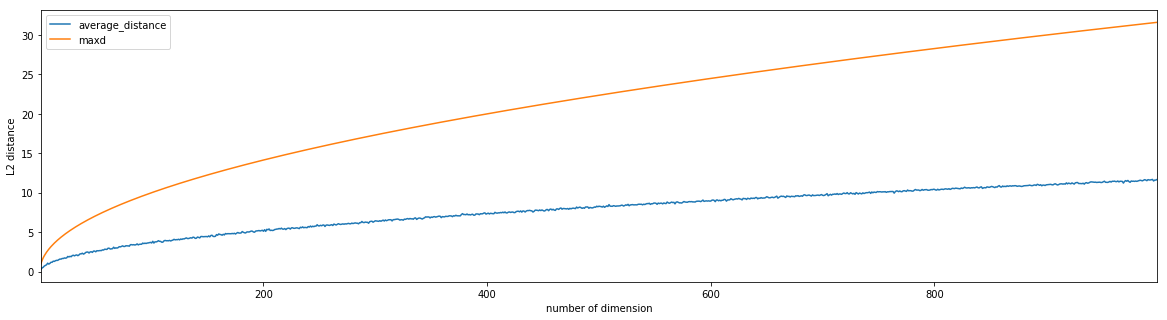

In [4]:
%matplotlib inline
ax1 = results_df.set_index("dim").plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("L2 distance")

Text(0, 0.5, 'Distance in ratio(L2 distance/Max)')

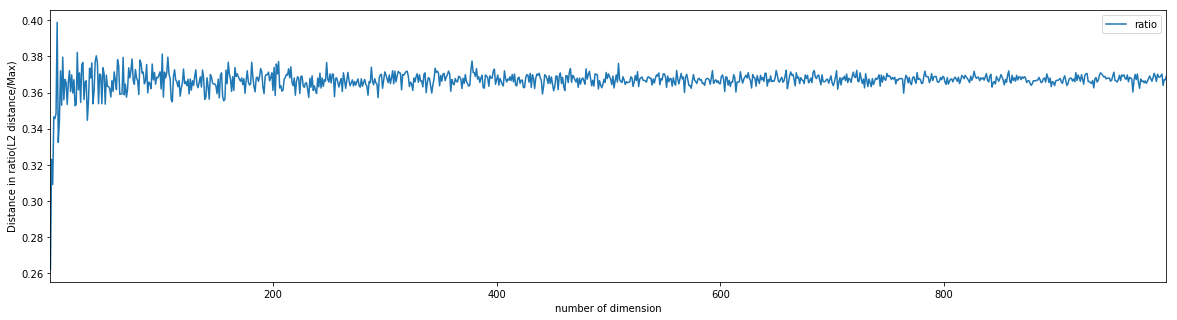

In [5]:
results_df["ratio"] = results_df.apply(lambda x:x["average_distance"]/x["maxd"],axis=1)
ax1 = results_df.set_index("dim").loc[:,["ratio"]].plot(figsize=(20,5))
ax1.set_xlabel("number of dimension")
ax1.set_ylabel("Distance in ratio(L2 distance/Max)")